# Exercise 1: Model of a neuron and the learning process

## 1.1 Model of a neuron

Write a Python function, which calculates the output of a neuron. Assume a model of a neuron shown in Figure 1 with three inputs and a threshold. The threshold can be interpreted as an additional input with fixed input of $-1$ and weight $w_{10}$. The output of the function has to correspond to output of the neuron.

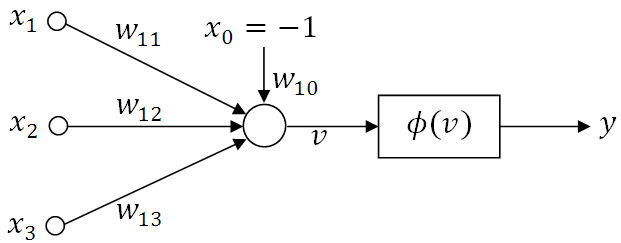

Figure 1. Model of a neuron

Use the scalar product of input vector $[x_0 x_1 x_2 x_3]$ and weights $[x_0 x_1 x_2 x_3]$ in order to calculate the neuron activation. The function has to have an additional input, which is used to select different nonlinear activation functions. The function should support the following nonlinear functions:

1. Step function
2. Piecewise linear function (ramp)
3. Sigmoid function defined as $\phi = \frac{1}{1+\exp (-av)}$, with $a=1$

**Tasks**

1. Write the code for calculating the aforementioned nonlinear functions and for the function which calculates the output of a neuron.

In [205]:
import numpy as np

def step_function(x):
    return int(x >= 0)

def ramp_function(x):
    return max(0, min(1, x))

def sigmoid_function(x, a=1):
    return 1 / (1 + np.exp(-a * x))

def neuron(x, w, activation):
    x = np.insert(x, 0, -1)
    
    weighted_sum = np.dot(x, w)
    
    if activation == 'step':
        return step_function(weighted_sum)
    elif activation == 'ramp':
        return ramp_function(weighted_sum)
    elif activation == 'sigmoid':
        return sigmoid_function(weighted_sum)


**Tasks**

1. Pick a random weight vector $\mathbf{w}$. Write down the chosen weights and print the neuron response for following inputs (for each activation function):

$x_1 = [0.5, 1, 0.7]^T$

$x_2 = [0, 0.8, 0.2]^T$


In [206]:
# Write your code here
w = np.random.rand(4)
print("Weights:", w, "\n")

activation_list = ['step', 'ramp', 'sigmoid']

x1 = np.array([0.5, 1, 0.7])
x2 = np.array([0, 0.8, 0.2])

# output for x1
for a in activation_list:
    print("x1 = {}, activation_fn = {} \nOutput = {}\n".format(x1, a, neuron(x1, w, a)))

# output for x2
for a in activation_list:
    print("x2 = {}, activation_fn = {} \nOutput = {}\n".format(x2, a, neuron(x2, w, a)))



Weights: [0.33637723 0.3055679  0.46149183 0.81020285] 

x1 = [0.5 1.  0.7], activation_fn = step 
Output = 1

x1 = [0.5 1.  0.7], activation_fn = ramp 
Output = 0.8450405477227946

x1 = [0.5 1.  0.7], activation_fn = sigmoid 
Output = 0.6995257504359413

x2 = [0.  0.8 0.2], activation_fn = step 
Output = 1

x2 = [0.  0.8 0.2], activation_fn = ramp 
Output = 0.1948568048722532

x2 = [0.  0.8 0.2], activation_fn = sigmoid 
Output = 0.5485606477214989



## 1.2 Three neuron network

Write a function for a three neuron network (Figure 2) using the function developed in section 1.1.. Assume that neurons use the sigmoid transfer function, where $a=1$ and assume the weights are given as follows:

$w_1=[1, 0.5, 1, -0.4]$

$w_2=[0.5, 0.6, -1.5, -0.7]$

$w_3=[-0.5, -1.5, 0.6]$

*Remark*: The first element of the weight vector is the threshold of a neuron and is shown as $w_{i0}$ in Figure 2.

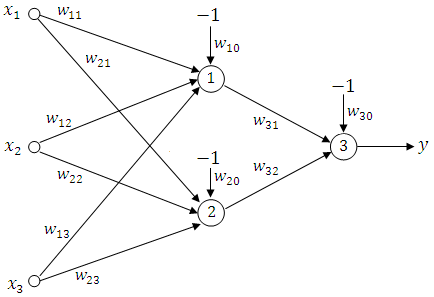

Figure 2. Three neuron network



**Tasks**

1. Write the code for calculating the output of the network shown in Fig. 2.

In [207]:
def three_neuron_network(x):
    w1 = [1, 0.5, 1, -0.4]
    w2 = [0.5, 0.6, -1.5, -0.7]
    w3 = [-0.5, -1.5, 0.6]

    output1 = neuron(x, w1, 'sigmoid')
    output2 = neuron(x, w2, 'sigmoid')
    output3 = neuron([output1, output2], w3, 'sigmoid')

    return output3

x = [0.3, 0.7, 0.9]
print("Output:", three_neuron_network(x))



Output: 0.5021828523608841


**Tasks**

1. Print the output of the network for input given as $x=[0.3, 0.7, 0.9]^T$.
2. Does the output of the network depend on neuron weights?
    - Answer: The output of the network DOES depend on neuron weights, since each neuron calculates a weighted sum (w*x), that in turn depends on weights (w) of the connections going into the neuron, along with the input values (x).

## 1.3 Delta rule

The goal of this experiment is to better understand the learning process. In this experiment we will implement a logical AND function using one neuron with two inputs and a threshold (see Figure 3). We will use the sigmoid nonlinear activation function with $a=1$.

For the learning phase, we have to define the following input output pairs $x_i$, $y_i$ for the logical AND function: for inputs $x_1=[-1, 0, 0]^T$, $x_2=[-1, 0, 1]^T$, and $x_3=[-1, 1, 0]^T$ the output $y$ should be equal to $0$; for input vector $x_4=[-1, 1, 1]^T$ the output value $y$ should be equal to $1$. The first component of all input vectors has value $-1$ and defines the neuron threshold visible as $w_{10}$ in Fig. 3. At the beginning we set the neuron weights to random values. We use the delta rule in order to update the weights:

$$\Delta w_{kj}=\eta e_{k}(n)x_{j}(n)$$

where

$$e_{k}(n)=d_{k}(n)-y_{k}(n)$$

where $d_{k}(n)$ is the expected neuron output and $y_{k}(n)$ is the obtained neuron output. This iterative procedure is repeated until the error is sufficiently small.

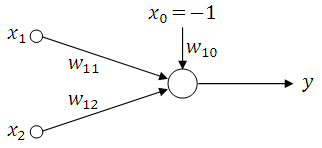

Figure 3. One neuron network

**Tasks**

1. Write the code which iteratively calculates the output of the network and uses the delta rule to update the weights until the error is sufficiently small. Experiment with different starting weights and different learning rates. (In case of instabilities, perform the experiment using a small learning rate, for example $\eta =0.05$). Show the error function ($y$-axis) and number of iterations ($x$-axis) for different learning rates.

    - What is the best learning rate? How does the learning rate affect the neural network?
        - Answer: The best learning rate depends on the specific problem and initial weights, but it can be determined by experimenting with different learning rates. In general, the learning rate affects the convergence speed and stability of the neural network. A larger learning rate may result in faster convergence, but it can also lead to overshooting the optimal weights, resulting in oscillations and instability. A smaller learning rate might converge more slowly but is less likely to overshoot, and is more stable.
    - How did you define the sufficiently small error used to terminate the algorithm?
        - Answer: I set the error threshold to 0.01, because it is generally advised that a "good" error is anywhere between 0 and 0.05, although it depends on the particular problem. A threshold of 0.01 here makes it so that the algorithm converges in a few seconds, and even if it may not be the global optimum, it will be good enough for this particular task for demonstration. Usually one would pick an error threshold based on how well the neural network generalises, i.e. the point at which the error stops to decrease and begins to increase on the validation data set (which is a set that's separate from the training data set), in relation to the error threshold (which we are also increasing, starting from a small value), is the point where it's the optimal error threshold to use to terminate the algorithm.
    - After how many iterations does the algorithm terminate?
        - Answer: The number of iterations required for the algorithm to terminate depends on several factors, including the initial weights, the learning rate, and the threshold. It's not fixed, and it can vary from one execution to another. The algorithm terminates when the sum of squared errors for all training examples falls below the defined threshold. Graph below shows particular iteration counts for different learning rates, after executing the code.


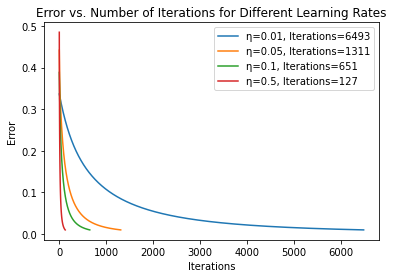

In [208]:
import matplotlib.pyplot as plt

x1 = [-1, 0, 0]
x2 = [-1, 0, 1]
x3 = [-1, 1, 0]
x4 = [-1, 1, 1]

X = [x1, x2, x3, x4]

y = [0,0,0,1]

learning_rates = [0.01, 0.05, 0.1, 0.5]

iterations_per_learning_rate = []

threshold = 0.01

for learning_rate in learning_rates:
    w = np.random.rand(3)
    iteration=0
    error_history = []

    while True:
        errors = np.zeros(len(X))

        for i in range(len(X)):
            input_vector = np.array(X[i])
            expected_output = y[i]
            output = neuron(X[i][1:], w, 'sigmoid')

            errors[i] = expected_output - output
            w += learning_rate * errors[i] * input_vector

        sum_sqr_error = np.sum(errors**2) / 2
        error_history.append(sum_sqr_error)
        
        iteration += 1

        if sum_sqr_error < threshold:
            break
    
    iterations_per_learning_rate.append((learning_rate, error_history, iteration))

for learning_rate, error_history, iterations in iterations_per_learning_rate:
    plt.plot(range(1, len(error_history) + 1), error_history, label=f'η={learning_rate}, Iterations={iterations}')

plt.xlabel('Iterations')
plt.ylabel('Error')
plt.legend()
plt.title('Error vs. Number of Iterations for Different Learning Rates')
plt.show()    


# Exercise 2: Associative memory

## 2.1 Forming the correlation matrix directly

In this part of the exercise we will use the direct approach in forming the correlation matrix. Memory based on the correlation matrix should memorize input-output association pairs represented as vectors. For each input vector (key) the memory has to memorize the output pattern i.e. vector in an ASCII code formulation. In this example we will use 4-dimensional input and output vectors. Words (output vectos) that have to be memorized are: '*vrat*' , '*kraj*' , '*cres*' , '*otac*'. Vectors $b_i$, which represent those words should be formed as follows:

In [209]:
real=lambda x: np.array([[ord(character) for character in x]]).T

b1=real("vrat")
b2=real("kraj")
b3=real("cres")
b4=real("otac")

### 2.1.1 Orthogonal input vectors

This experiment demonstrates how to create an associative memory. Ortonormalized set of vectors defined as below

In [210]:
a1 = np.array([[1, 0, 0, 0]]).T
a2 = np.array([[0, 1, 0, 0]]).T
a3 = np.array([[0, 0, 1, 0]]).T
a4 = np.array([[0, 0, 0, 1]]).T

is used as input vector set (set of keys). We form the memory correlation matrix $\mathbf{M}$ using input output pairs as follows:

In [211]:
M = b1 * a1.T + b2 * a2.T + b3 * a3.T + b4 * a4.T
print(M)

[[118 107  99 111]
 [114 114 114 116]
 [ 97  97 101  97]
 [116 106 115  99]]


In order to verify whether the memory is functioning properly, we have to calculate outputs for each input vector. For example, the output for the key $a_1$ can be obtained as follows:

In [212]:
char=lambda x:"".join(map(chr, map(int, list(x))))

word=char(M@a1)
print(word)

vrat


**Tasks**

For each key, print the key and the corresponding output.
1. Were all input-output pairs memorized correctly?
    - Answer: all input-output pairs were memorized correctly, as seen in the output below.
2. How many input-output pairs would be memorized if vectors $a_i$ were not normalized?
    - Answer: If the vectors a_i were not normalized, the corresponding (and supposedly memorised) vectors b_i would not be accessible (at least not without making changes to the algorithm of memorisation itself, that is the construction of the matrix M). Therefore, potentially no input-output pairs would be memorized correctly. Vectors that aren't normalized may result in too large (or too small) values, that then produce odd, incorrect associations.

In [213]:
# Write your code here
for key in [a1, a2, a3, a4]:
    print("Key:", key.T, " Output:", char(M@key)) # keys are transposed here

Key: [[1 0 0 0]]  Output: vrat
Key: [[0 1 0 0]]  Output: kraj
Key: [[0 0 1 0]]  Output: cres
Key: [[0 0 0 1]]  Output: otac


### 2.1.2 Correlation matrix properties

The goal of this experiment is to demonstrate the capacity of obtained memory. In this part of the exercise we will try to memorize one more (fifth) word ('*mrak*'). In 4-dimensional vector space the maximum number of linearly independent vectors is four. Because of this fact, we pick an arbitrary unit vector as the fifth key, for example:

In [214]:
a5 = (a1 + a3) / np.sqrt(2)

Form vectors $b_5$ ('*mrak*') and $a_5$ as explained and add them into the memory using the following expression:

In [215]:
b5 = real("mrak")
M_five = b1 * a1.T + b2 * a2.T + b3 * a3.T + b4 * a4.T + b5 * a5.T

**Tasks**

Once again, print each key and the corresponding output.
1. Was the new association properly memorized?
    - Answer: the new association wasn't properly memorized. The output consists of unexpected characters.
2. Did other associations stay correctly memorized?
    - If not - which were not memorized correctly and why?
    - If yes - which were memorized correctly and why?
        - Answer: associations a1-b1 and a3-b3 weren't correctly memorized, because vectors a1 and a3 are linearly dependent on the newly introduced vector a5 and vice versa. Associations a2-b2 and a4-b4 were correctly memorized, as a2 and a4 are linearly independent from other input vectors.

In [216]:
# Write your code here
for key in [a1, a2, a3, a4, a5]:
    print("Key:", key.T, " Output:", char(M_five@key)) 

Key: [[1 0 0 0]]  Output: ÃÂ¥¿
Key: [[0 1 0 0]]  Output: kraj
Key: [[0 0 1 0]]  Output: °Â©¾
Key: [[0 0 0 1]]  Output: otac
Key: [[0.70710678 0.         0.70710678 0.        ]]  Output: ĆēíĎ


### 2.1.3 Word pairs as associations

In this experiment we will form the associative memory, which memorizes word pairs. The associations, which have to be memorized are: *ruka*-*vrat*, *kset*-*kraj*, *more*-*cres*, *mama*-*otac*. Generate input vectors (keys) as follows:

In [217]:
a1 = real("ruka")
a2 = real("kset")
a3 = real("more")
a4 = real("mama")
M = b1 * a1.T + b2 * a2.T + b3 * a3.T + b4 * a4.T
print(M)

[[47791 47867 46818 44624]
 [50264 50354 49352 47048]
 [43019 43124 42263 40271]
 [47892 48130 47019 44766]]


**Tasks**

1. What is the response for each input key?
    - Answer: response is an error indicating that our keys go outside the range of valid arguments for chr() function.
2. Which associations were memorized correctly?
    - Answer: no associations were memorised correctly, because of the error.
3. Which associations were not memorized correctly and why?
    - Answer: no association was memorised correctly, because we didn't use orthonormal input vectors (a1-a4), and so, the product matrix of a and b vectors (the memory matrix M) - has too large values for them to be interpreted as ASCII characters.
4. How can we fix this problem?
    - Answer: we can orthogonalize the input vectors, which we can do using the Gram-Schmidt process, since the vectors are linearly independent from eachother.

In [218]:
# Write your code here
for key in [a1, a2, a3, a4]:
    print("Key:", key.T, " Output:", char(M@key)) 

ValueError: chr() arg not in range(0x110000)

### 2.1.4 Input vector orthogonalization

In this experiment we show an associative memory, which uses keys that are orthonormalized. We use the Gram-Schmidt orthogonalization method as follows. We first form the matrix $\mathbf{A}$ using vectors $a_i$:

In [219]:
A=np.hstack([a1, a2, a3, a4])

After this step we perform the orthonormalization step:

In [220]:
from scipy.linalg import orth
C=orth(A.T)

We extract individual orthonormal vectors $c_i$:

In [221]:
c1=np.array([C[0]]).T
c2=np.array([C[1]]).T
c3=np.array([C[2]]).T
c4=np.array([C[3]]).T

In the next step we form a new matrix $\mathbf{M}$ using vectors $c_i$ instead of vectors $a_i$ when creating the matrix $\mathbf{M}$.

In [222]:
M = b1 * c1.T + b2 * c2.T + b3 * c3.T + b4 * c4.T

**Tasks**

Verify the responses of matrix $\mathbf{M}$ with vectors $c_i$ as inputs.
1. What is the effect of vector orthonormalization?
    - Answer: The vector orthonormalization process ensures that the input vectors are orthogonal to each other (and that they're normalized). This means that the vectors are independent and do not interfere with each other during the memorization process. The effect is that we can memorize multiple associations without interference.
2. How many pairs were correctly memorized?
    - Answer: All the pairs were correctly memorized.
3. What can we expect when normalizing the vectors?
    - Answer: When normalizing the vectors, the vectors will be scaled to have a magnitude of 1, but they may not necessarily be orthogonal. The effect is that we might not be able to memorize all pairs, as there will still be some interference between the vectors.
4. What can we expect when only orthogonalizing the vectors?
    - Answer: Orthogonalizing the vectors will make them (linearly) independent of each other, but they may not be normalized (magnitude 1). We can expect to memorize all pairs without interference (but the effect is as explained in 2.1.1., question 2.)
5. What can we expect if vectors $c_i$ are linearly independent but not orthogonal?
    - Answer: If the vectors c_i are linearly independent but not orthogonal, we can still memorize all pairs, but there might be some interference between the associations.

In [223]:
# Write your code here
for key in [c1, c2, c3, c4]:
    print("Key:", key.T, " Output:", char(M@key)) 

Key: [[-0.50594743  0.14847022 -0.77925491 -0.33872641]]  Output: vrat
Key: [[-0.50939047 -0.83525837  0.19795538 -0.06065043]]  Output: kraj
Key: [[-0.50546797  0.25257838  0.01775974  0.8248581 ]]  Output: cres
Key: [[-0.47858195  0.46530012  0.59435684 -0.44854773]]  Output: otac


### 2.1.5 Finding the correlation matrix using matrix inversion

For previously used word pairs (*ruka*-*vrat*, *kset*-*kraj*, *more*-*cres*, *mama*-*otac*) find a $4\times 4$ correlation matrix $\mathbf{M}$ as $\mathbf{M} = \mathbf{B}\mathbf{A}^{-1}$, where matrix $\mathbf{B}$ is defined as:

In [236]:
B=np.hstack([b1, b2, b3, b4])
M=B@np.linalg.inv(A)
print(M)

[[ 2.61453831 -0.42249469 -1.18860108 -0.03551725]
 [ 0.86259171 -0.29902568  0.16622243  0.33881185]
 [ 0.11877619  0.02550434  0.55198385  0.220755  ]
 [-0.34587034  1.00278743  0.66319844 -0.33875405]]


**Tasks**

1. Were all associations properly memorized? Remark: The result should be rounded to the nearest number before comparison.
    - Answer: all associations were properly memorized.

In [242]:
# Write your code here
for key in [a1, a2, a3, a4]:
    print("Key:", key.T, " Output:", char(np.round(M@key)))
    

Key: [[114 117 107  97]]  Output: vrat
Key: [[107 115 101 116]]  Output: kraj
Key: [[109 111 114 101]]  Output: cres
Key: [[109  97 109  97]]  Output: otac


### 2.1.6 Finding the correlation matrix using pseudo-inversion

A pseudo-inverse matrix can be used in order to find the correlation matrix when number of associations is larger than dimensionality of vectors representing the associations. In this case, the correlation matrix can be found as $\mathbf{M} = \mathbf{B}\mathbf{A}^{+}$, where $\mathbf{A}^{+}$ is a pseudo-inverse matrix defined as $\mathbf{A}^{+} = \mathbf{A}^{T}(\mathbf{A}\mathbf{A}^{T})^{-1}$.

Assume that the vectors $a_i$ and $b_i$ are defined previously (five associations in total). Find the pseudo-inverse matrix for this case.

In [244]:
a1 = np.array([[1, 0, 0, 0]]).T
a2 = np.array([[0, 1, 0, 0]]).T
a3 = np.array([[0, 0, 1, 0]]).T
a4 = np.array([[0, 0, 0, 1]]).T

a5 = (a1 + a3) / np.sqrt(2)

A=np.hstack([a1, a2, a3, a4, a5])
B=np.hstack([b1, b2, b3, b4, b5])
A_pseudo=A.T@np.linalg.inv(A@A.T)
M=B@A_pseudo

**Tasks**

1. Were all pairs memorized correctly?
    - Answer: pairs a1-b1, a3-b3 and a5-b5 were memorized incorrectly, while pairs a2-b2 and a4-b4 were memorized correctly.
2. If not, what is the error between expected and obtained values?
    - Answer: the calculated error between expected and obtained values is 232.

In [249]:
# Write your code here
for key in [a1, a2, a3, a4, a5]:
    print("Key:", key.T, " Output:", char(np.round(M@key)))

error = np.sum(np.abs(B - np.round(M @ A)))

print("Error:", error)

Key: [[1 0 0 0]]  Output: faR`
Key: [[0 1 0 0]]  Output: kraj
Key: [[0 0 1 0]]  Output: SaV_
Key: [[0 0 0 1]]  Output: otac
Key: [[0.70710678 0.         0.70710678 0.        ]]  Output: w
Error: 232.0


## 2.2 Finding the correlation matrix using supervised learning

This experiment shows us how to form the matrix $\mathbf{M}$ using supervised learning. In two following experiments we will use learning with error correction.

### 2.2.1 Learning with error correction

Form matrices $\mathbf{A}$ and $\mathbf{B}$ where each contains 4 vectors stacked in columns as explained in previous experiments. Check the contents of obtained matrices with following operations:

In [250]:
a1=real("ruka")
a2=real("kset")
a3=real("more")
a4=real("mama")

b1=real("vrat")
b2=real("kraj")
b3=real("cres")
b4=real("otac")

A=np.hstack([a1, a2, a3, a4])
B=np.hstack([b1, b2, b3, b4])

In order to start the learning procedure we have to initialize the matrix $\mathbf{M}$ (For example, random values uniformly generated in $[-0.5, 0.5]$ interval):

In [251]:
M=np.random.rand(4, 4)-0.5

For the learning part use the function *trainlms*, which is the implementation of the Widrow-Hoff LMS learning algorithm. The function can be used as follows:

In [252]:
def trainlms(A, B, M, ni, max_num_iter, min_err=0.02):
    d=B
    x=A
    w=M

    n=0
    err=[]
    while (n<max_num_iter):
        n+=1
        e=d-w@x
        w+=ni*np.dot(e, x.T)
        err.append(np.sum(np.sum(np.multiply(e, e))))
        if (err[-1]<min_err):
            break
    return w, err

where *max_num_iter* is the number of iterations and *ni* is the learning rate. Find the *max_num_iter* variable experimentally. For *ni* you can use:

In [253]:
ni=0.9999/np.linalg.eig(A @ A.T)[0].max()

The function trainlms performs the learning until SSE drops below $0.02$ or maximum number of iterations is performed. After the learning phase, look at the responses of the correlation matrix $\mathbf{M}$:

In [254]:
M, e=trainlms(A, B, M, ni, 100000)

If we type

In [255]:
np.round(M@A)==B

array([[ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True]])

we will see, which characters were properly reconstructed: the positions with correct reconstructions will have value *True* and  other positions will have value *False*. By calling the *trainlms* multiple times we can extend the learning process and maybe increase the number of memorized characters but the proper way to extend the learning process is to increase the *max_num_iter* variable. We can draw a graph, which plots the error with number of iterations (in logaritmic scale) using the following commands:

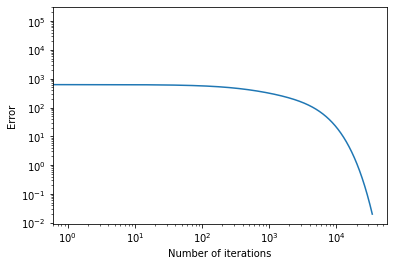

In [256]:
plt.plot(e)
plt.yscale("log")
plt.xscale("log")
plt.xlabel("Number of iterations")
plt.ylabel("Error")
plt.show()

**Tasks**

1. Plot a graph showing number of memorized characters tied to number of used iterations. (Caution: When building the graph, start the simulation with the same starting matrix.)

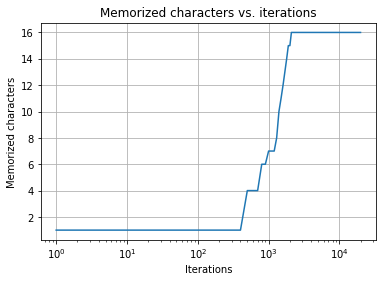

In [283]:
# Write your code here
iterations = []
memorized_chars = []
M_original = np.random.rand(4, 4) - 0.5

for max_num_iter in range(1, 20000, 100):
    M, e = trainlms(A, B, M_original, ni, max_num_iter)
    correct = np.round(M @ A) == B
    num_correct = np.sum(correct)
    
    iterations.append(max_num_iter)
    memorized_chars.append(num_correct)

plt.plot(iterations, memorized_chars)
plt.xlabel("Iterations")
plt.xscale('log')
plt.ylabel("Memorized characters")
plt.title("Memorized characters vs. iterations")
plt.grid(True)
plt.show()

## 2.2.2 Effect of larger number of associations

This experiment demonstrates the capacity of the associative memory. What is the capacity of a $4\times 4$ correlation matrix based associative memory?

**Tasks**
1. For additional pair '*auto*'-'*mrak*' create vectors $a_5$ and $b_5$ as explained in the previous part of the exercise. Create new matrices A and B with dimensions $4$ (rows) $\times$ $5$ (columns) in the same way as previously explained. Initialize the matrix $\mathbf{M}$ with random starting values.

In [290]:
# Write your code here
a1 = real("ruka")
a2 = real("kset")
a3 = real("more")
a4 = real("mama")
a5 = (a1 + a3) / np.sqrt(2)

b1 = real("vrat")
b2 = real("kraj")
b3 = real("cres")
b4 = real("otac")
b5 = real("mrak")

A = np.hstack([a1, a2, a3, a4, a5])
B = np.hstack([b1, b2, b3, b4, b5])

M= np.random.rand(4, 4) - 0.5



Use the *trainlms* function in the following way:

In [291]:
ni=0.9999/max(np.linalg.eig(np.dot(A, A.T))[0])
M, e=trainlms(A, B, M, ni, 100000)
print(np.sum(np.round(np.dot(M, A))==B))

sse_error = e[-1]

print("Number of iterations:", len(e))
print("Number of characters memorized correctly:", np.sum(np.round(np.dot(M, A))==B))
print("SSE error:", sse_error)

8
Number of iterations: 100000
Number of characters memorized correctly: 8
SSE error: 4614.432699199433


**Tasks**

1. How many iterations did you use?
    - Answer: 100000 iterations
2. How many characters were memorized correctly?
    - Answer: 8 characters were memorized correctly.
3. What is the SSE error?
    - Answer: SSE or Sum Squared Error is an accuracy measure where the errors are squared, then added. The SSE error is 4614.43270. 
4. What happens if we call the function from the beginning?
    - Answer: If we call the function from the beginning, we start with the same random initial values for the correlation matrix M. The number of correctly memorized characters and the SSE error may vary depending on the random initialization.
5. How many characters are correctly memorized now and how large is the mistake? Is there any difference and why?
    - Answer: the values are the same, 8 characters and mistake of 4614.43270, because the matrix M is already optimised, from the previous training.
6. Is it possible to train this network in order to memorize all five associations?
    - Answer: The capacity of a 4x4 correlation matrix-based associative memory is limited to four associations.
7. Why? (Explain the previous answer)
    - Answer: the memory space is limited, and we'd need larger memory for reliably storing five or more associations.